## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer   
from sklearn.compose import make_column_selector

from sklearn.linear_model import LogisticRegression

import playsound
import winsound


## Data Loading

In [2]:
with open("./data/data.csv", "r") as file:
    data_raw = pd.read_csv(file)

data_raw.head()

path  \
0  ./clips/common_voice_en_40187705.mp3   
1  ./clips/common_voice_en_40187697.mp3   
2  ./clips/common_voice_en_40187695.mp3   
3  ./clips/common_voice_en_40187693.mp3   
4  ./clips/common_voice_en_40187696.mp3   

                                            sentence sentence_domain      age  \
0  Any new copies were initialized with a success...             NaN  fifties   
1        He then led the life of a wandering hermit.             NaN  fifties   
2  Artume appeared as a recurring character in Ma...             NaN  fifties   
3  Cohousing cultivates a culture of sharing and ...             NaN  fifties   
4  In practice however the resistive element vari...             NaN  fifties   

           gender           accents  mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  \
0  male_masculine  Canadian English   -449.487457    119.852509      7.753420   
1  male_masculine  Canadian English   -494.584290    125.826019     18.260662   
2  male_masculine  Canadian English   -503.006805    131.359589     15.189734   
3  male_masculine  Canadian English   -466.040344    111.497826      7.834814   
4  male_masculine  Canadian English   -473.256073    116.954979     12.820942   

   mfcc_04_mean  ...  spec_contrast_band_4_std  spec_contrast_band_5_std  \
0     30.211107  ...                  4.427589                  3.374920   
1     23.508959  ...                  4.600072                  4.264892   
2     18.775719  ...                  4.263854                  6.058417   
3     21.756237  ...                  4.760368                  4.768118   
4     26.763842  ...                  4.252196                  4.170021   

   spec_contrast_band_6_std  spec_contrast_band_7_std  spec_rolloff_mean  \
0                  8.790948                  4.794475        4491.619810   
1                  7.531223                  4.263827        4458.521793   
2                  6.529373                  3.953812        4289.709689   
3                  6.406526                  3.485832        4421.248209   
4                  5.473282                  3.982934        4656.431159   

   spec_rolloff_std  zcr_mean   zcr_std  rmse_mean  rmse_std  
0       2971.032386  0.078209  0.080991   0.021588  0.023391  
1       2792.566125  0.061128  0.059886   0.016811  0.020808  
2       2843.069699  0.067131  0.057595   0.013110  0.014007  
3       2540.725526  0.072797  0.060684   0.015802  0.019355  
4       2868.399050  0.082116  0.086288   0.016562  0.018280  

[5 rows x 94 columns]

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   path                       45358 non-null  object 
 1   sentence                   45358 non-null  object 
 2   sentence_domain            384 non-null    object 
 3   age                        44929 non-null  object 
 4   gender                     45358 non-null  object 
 5   accents                    38582 non-null  object 
 6   mfcc_01_mean               45358 non-null  float64
 7   mfcc_02_mean               45358 non-null  float64
 8   mfcc_03_mean               45358 non-null  float64
 9   mfcc_04_mean               45358 non-null  float64
 10  mfcc_05_mean               45358 non-null  float64
 11  mfcc_06_mean               45358 non-null  float64
 12  mfcc_07_mean               45358 non-null  float64
 13  mfcc_08_mean               45358 non-null  flo

In [4]:
data_raw["age"].unique()

array(['fifties', 'fourties', 'twenties', 'thirties', 'teens', 'sixties',
       nan, 'seventies'], dtype=object)

In [5]:
def transform_age(age):
    if age=="teens":
        return 10
    elif age=="twenties":
        return 20
    elif age=="thirties":
        return 30
    elif age=="fourties":
        return 40
    elif age=="fifties":
        return 50
    elif age=="sixties":
        return 60
    elif age=="seventies":
        return 70
    else:
        return None

data_raw["age"] = data_raw["age"].apply(transform_age)
print(data_raw["age"].isnull().sum())
data_raw.dropna(subset=["age"], inplace=True)

429


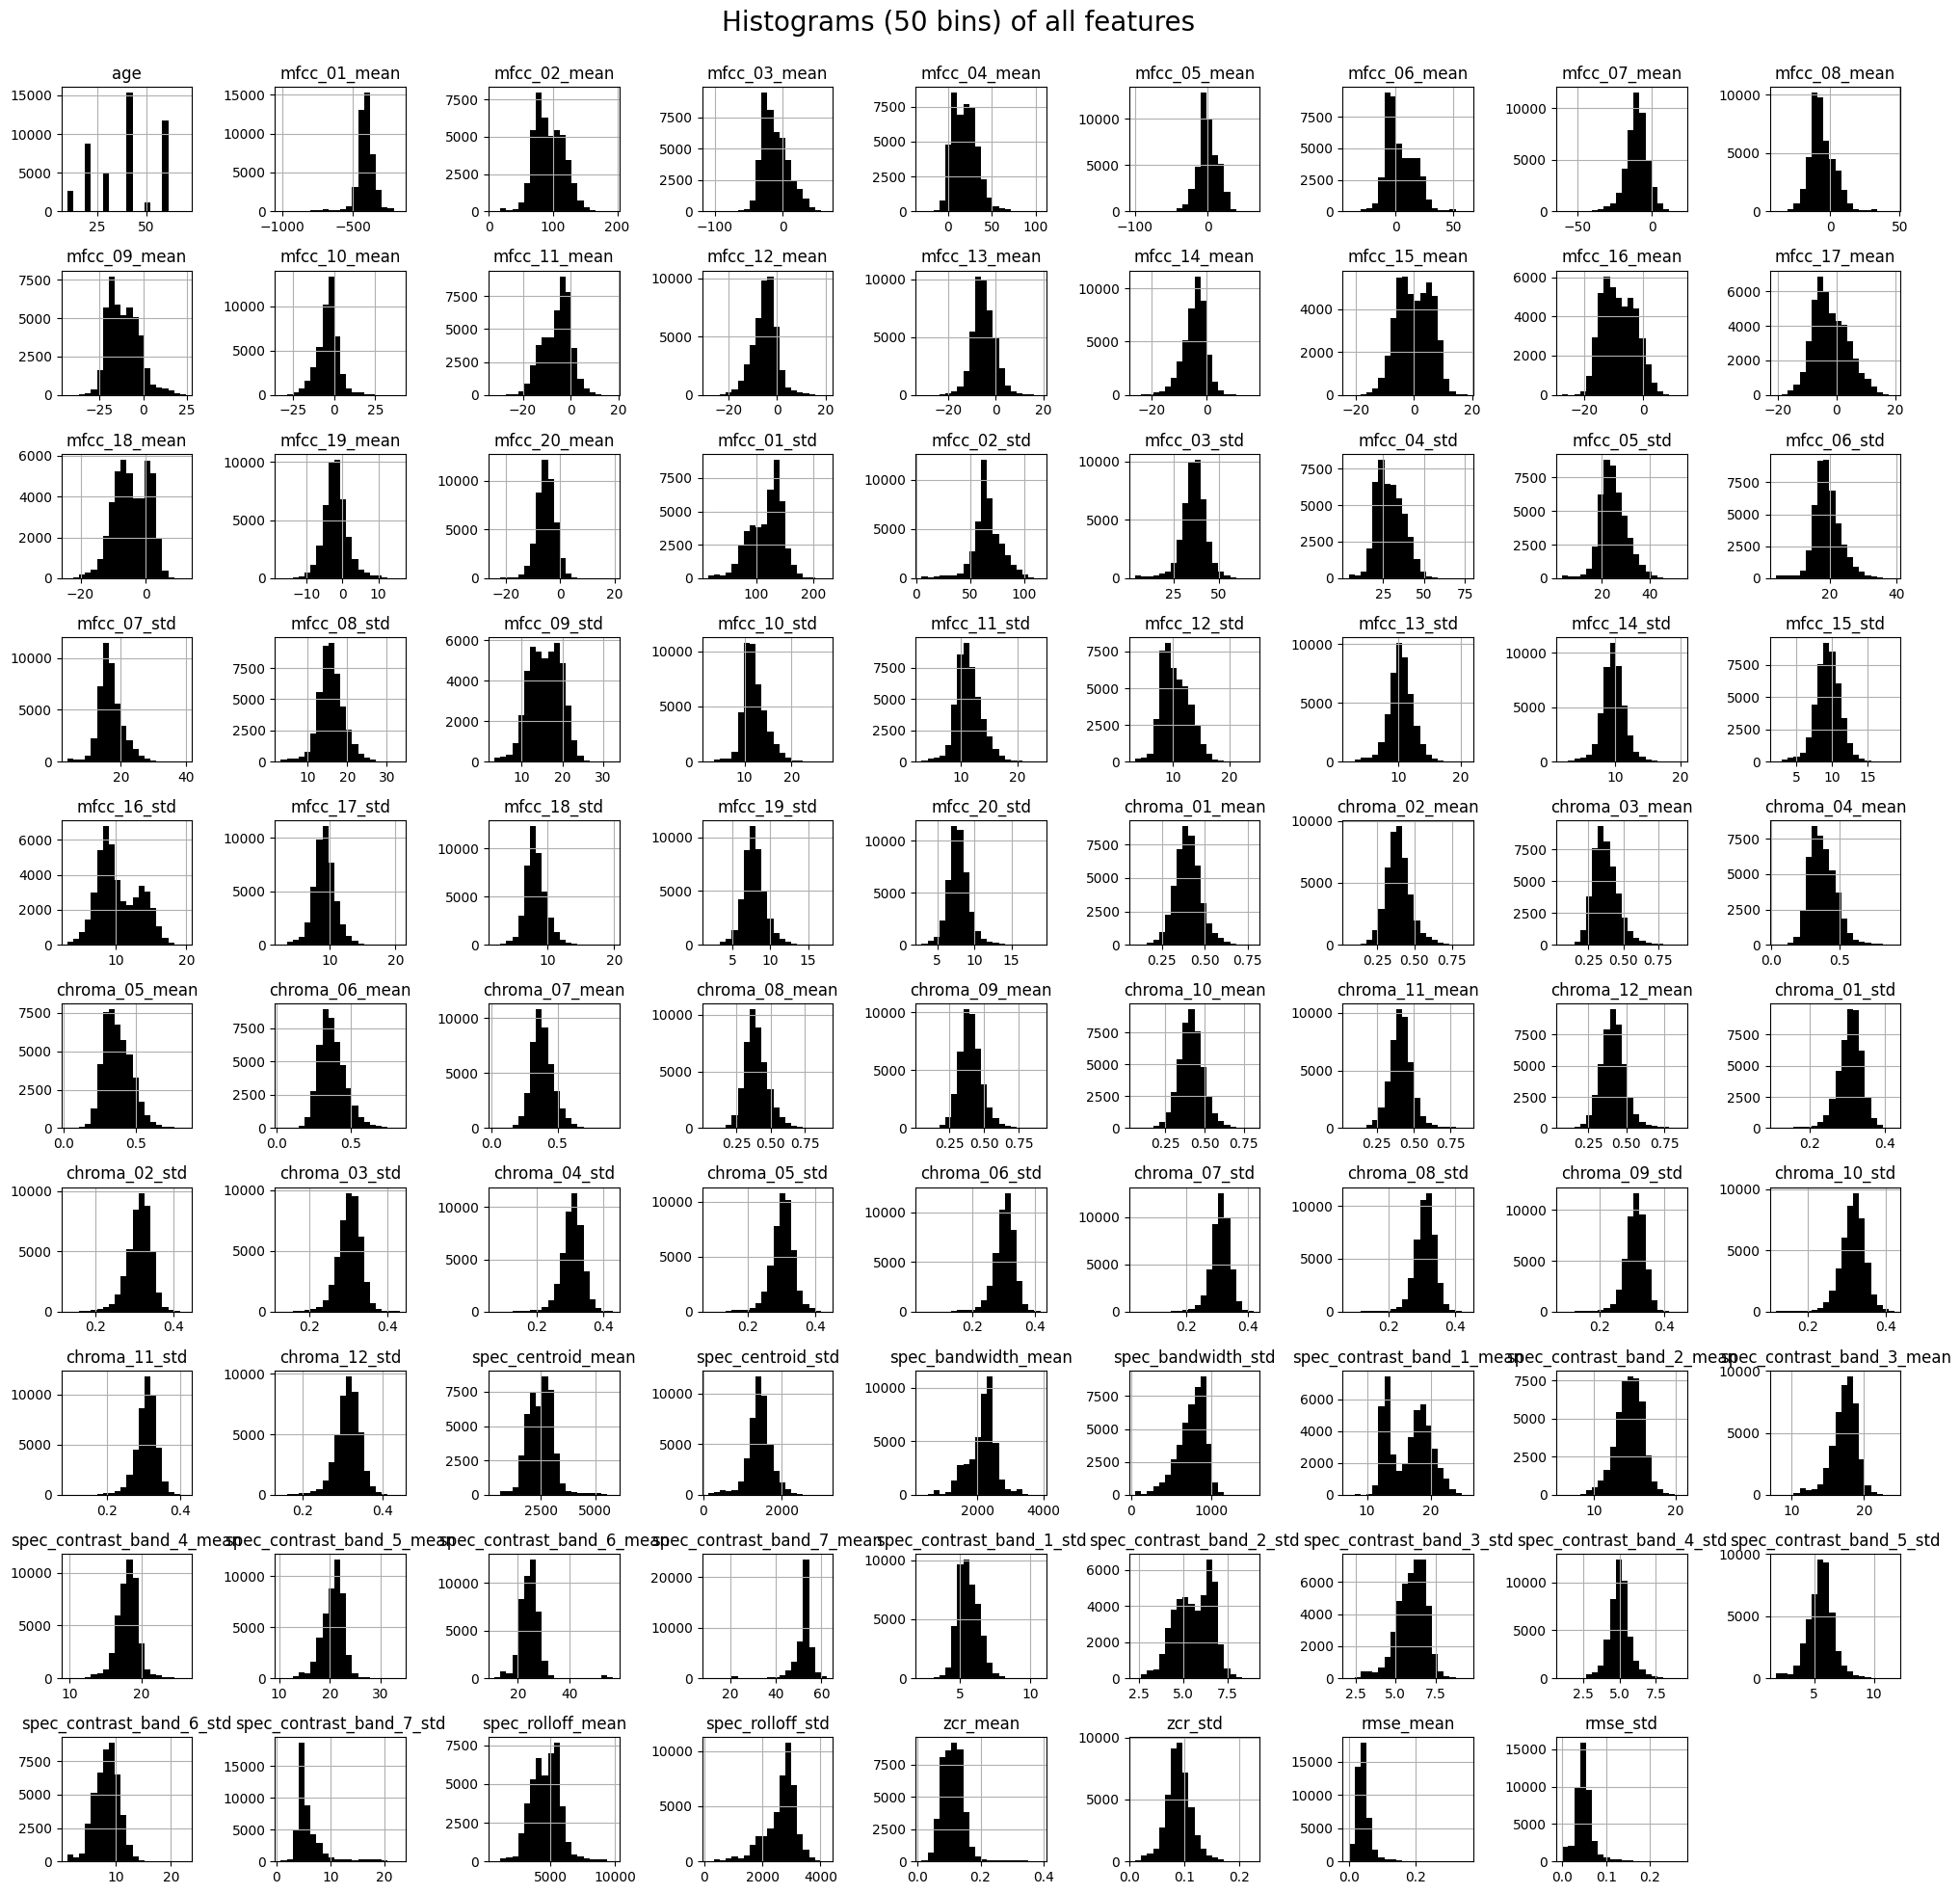

In [6]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 20), bins=20, color='black')
    plt.suptitle('Histograms (50 bins) of all features', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
histograms(data_raw)

In [7]:
# drop sentence_domain
try:
    data_raw = data_raw.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain dropped")

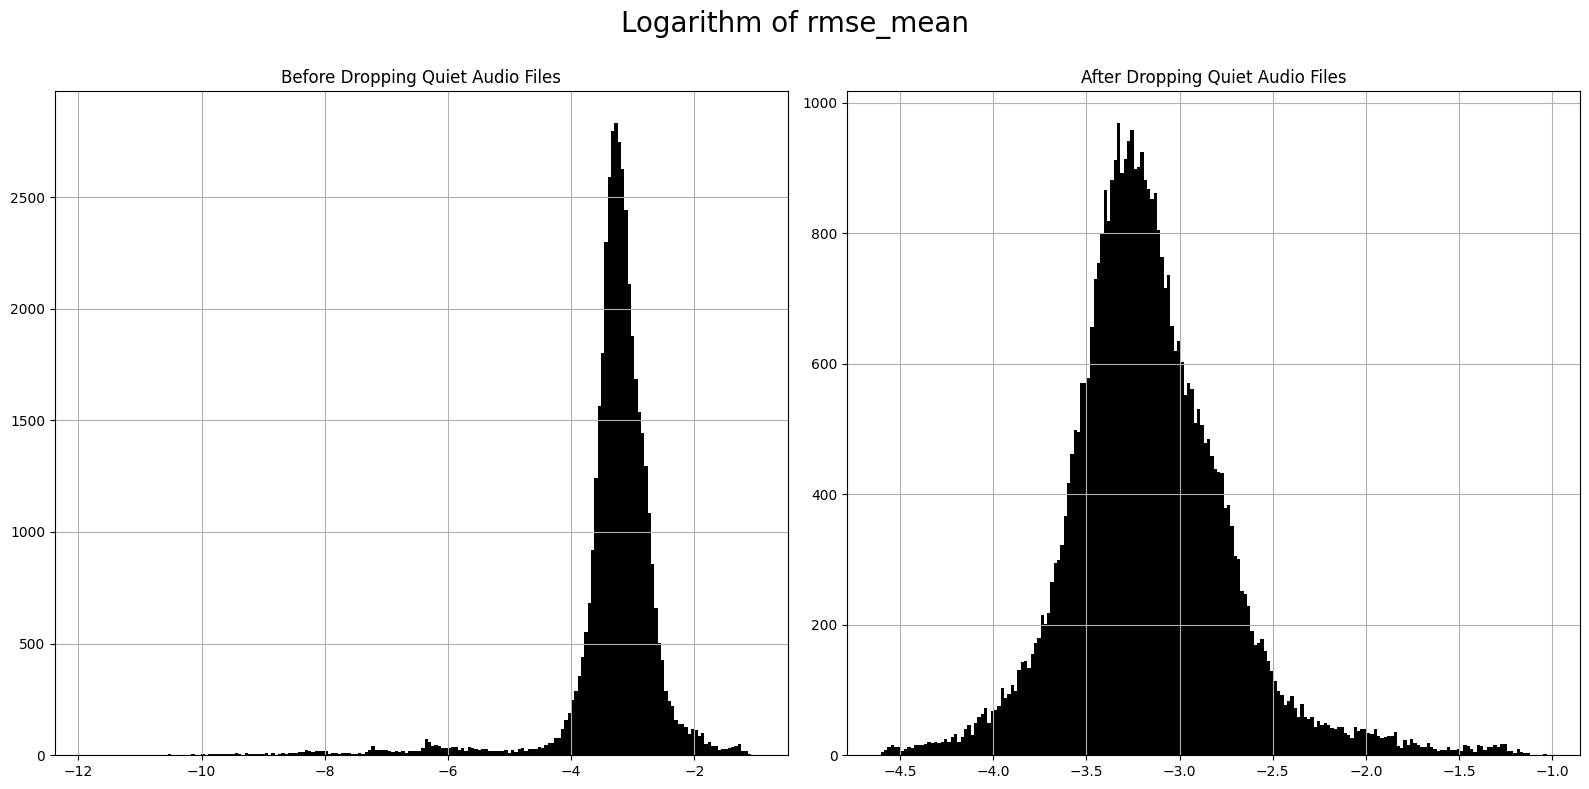

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First histogram
np.log(data_raw['rmse_mean']).hist(bins=200, ax=axes[0], color='black')
axes[0].set_title('Before Dropping Quiet Audio Files')

# Dropping quiet audio files
bool_mask_quiet = data_raw["rmse_mean"] < 0.01
data_raw = data_raw[~bool_mask_quiet]

# Second histogram
np.log(data_raw['rmse_mean']).hist(bins=200, ax=axes[1], color='black')
axes[1].set_title('After Dropping Quiet Audio Files')

plt.suptitle('Logarithm of rmse_mean', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [9]:
# Data frames 
y= data_raw[["gender", "age"]]
X= data_raw.drop(columns=["gender", "age"])

# Train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state= 27, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state= 27, shuffle=True)

# Df only for EDA
df_eda = X_train.copy()
df_eda['age'] = y_train['age']
df_eda['gender']= y_train['gender']
df_eda_cat = df_eda.select_dtypes(include=['object'])
df_eda_num = df_eda.select_dtypes(include=['number'])

# Drop columns that are not needed
X_train= X_train.drop(columns=["path", "sentence", "accents"])
X_test = X_test.drop(columns=["path", "sentence", "accents"])
X_val = X_val.drop(columns=["path", "sentence", "accents"])


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("X_val shape: ", X_val.shape)

X_train shape:  (30165, 88)
X_test shape:  (6464, 88)
X_val shape:  (6465, 88)


## EDA

In [10]:
df_eda.describe()

mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  mfcc_04_mean  mfcc_05_mean  \
count  30165.000000  30165.000000  30165.000000  30165.000000  30165.000000   
mean    -402.885536     93.862984    -11.081203     18.389674      0.636695   
std       49.638864     21.935309     19.116448     12.885761     13.044000   
min     -617.983276     23.225176   -109.845596    -27.812357    -68.547852   
25%     -433.992188     76.548759    -25.602516      7.788917     -7.217723   
50%     -408.754883     91.152916    -14.787502     17.920622     -1.037157   
75%     -375.864960    110.578438      0.925937     27.680954      9.941298   
max     -166.984146    193.263107     64.433517     82.343613     63.279827   

       mfcc_06_mean  mfcc_07_mean  mfcc_08_mean  mfcc_09_mean  mfcc_10_mean  \
count  30165.000000  30165.000000  30165.000000  30165.000000  30165.000000   
mean       3.208671    -10.106351     -6.594753    -11.291034     -4.210193   
std       11.689369      7.310692      8.379300      8.649166      6.005226   
min      -40.336555    -58.264080    -39.346924    -43.236217    -32.694038   
25%       -5.516914    -14.094908    -11.930946    -18.167332     -7.301068   
50%        0.212550     -9.775034     -7.769953    -12.328941     -3.463912   
75%       12.310742     -5.741852     -1.497746     -5.320669     -0.616008   
max       61.374790     19.852123     46.526283     23.842554     39.869076   

       ...  spec_contrast_band_5_std  spec_contrast_band_6_std  \
count  ...              30165.000000              30165.000000   
mean   ...                  5.606330                  8.547911   
std    ...                  0.982142                  2.004203   
min    ...                  2.359896                  1.913184   
25%    ...                  4.967363                  7.099289   
50%    ...                  5.627615                  8.598081   
75%    ...                  6.175117                  9.944860   
max    ...                 11.747129                 22.740114   

       spec_contrast_band_7_std  spec_rolloff_mean  spec_rolloff_std  \
count              30165.000000       30165.000000      30165.000000   
mean                   6.055178        4566.407034       2669.747362   
std                    2.840678        1073.275061        491.924774   
min                    2.065034         839.673913        437.884243   
25%                    4.553370        3793.701172       2431.941468   
50%                    5.132200        4619.035993       2780.672421   
75%                    6.478252        5360.256566       2987.248185   
max                   22.756141        9069.624607       4217.979050   

           zcr_mean       zcr_std     rmse_mean      rmse_std           age  
count  30165.000000  30165.000000  30165.000000  30165.000000  30165.000000  
mean       0.111484      0.090468      0.046514      0.052567     39.246478  
std        0.032909      0.022103      0.027304      0.024542     15.698784  
min        0.016085      0.010137      0.010001      0.003705     10.000000  
25%        0.087181      0.076878      0.032635      0.039513     30.000000  
50%        0.111142      0.089407      0.040402      0.048629     40.000000  
75%        0.132626      0.103156      0.052421      0.058852     60.000000  
max        0.370580      0.226764      0.340820      0.271961     70.000000  

[8 rows x 89 columns]

In [11]:
# comparing the means of the features using groupbys

def table_grouped_by(df, group_by_col):
    grouped_by_y = df.groupby(group_by_col).mean().T
    table = PrettyTable()
    table.field_names = ["Feature"]+list(grouped_by_y.columns)
    for feature, values in zip(grouped_by_y.index, grouped_by_y.values):
        table.add_row([feature] + values.tolist())
    table.align = "r"
    table.align["Feature"] = "l"
    table.title = "Grouped by " + group_by_col.name
    print(table)
    
table_grouped_by(df_eda_num, df_eda_cat['gender'])
table_grouped_by(df_eda_num, df_eda_num['age'])
table_grouped_by(df_eda_num, df_eda_cat['accents'])



+-----------------------------------------------------------------------+
|                           Grouped by gender                           |
+---------------------------+---------------------+---------------------+
| Feature                   |     female_feminine |      male_masculine |
+---------------------------+---------------------+---------------------+
| mfcc_01_mean              | -415.87070872518586 |  -380.7440182112245 |
| mfcc_02_mean              |   83.43465015792165 |  111.64473726007289 |
| mfcc_03_mean              | -16.625735000379134 | -1.6270081640392644 |
| mfcc_04_mean              |  14.860612902006181 |  24.407212719844082 |
| mfcc_05_mean              |  -5.818919475301189 |  11.644411220914233 |
| mfcc_06_mean              | -2.5823232348570535 |   13.08311732173504 |
| mfcc_07_mean              | -10.857541980487614 |  -8.825466984708788 |
| mfcc_08_mean              |  -9.364927270674682 | -1.8712228852634545 |
| mfcc_09_mean              | -14.2381

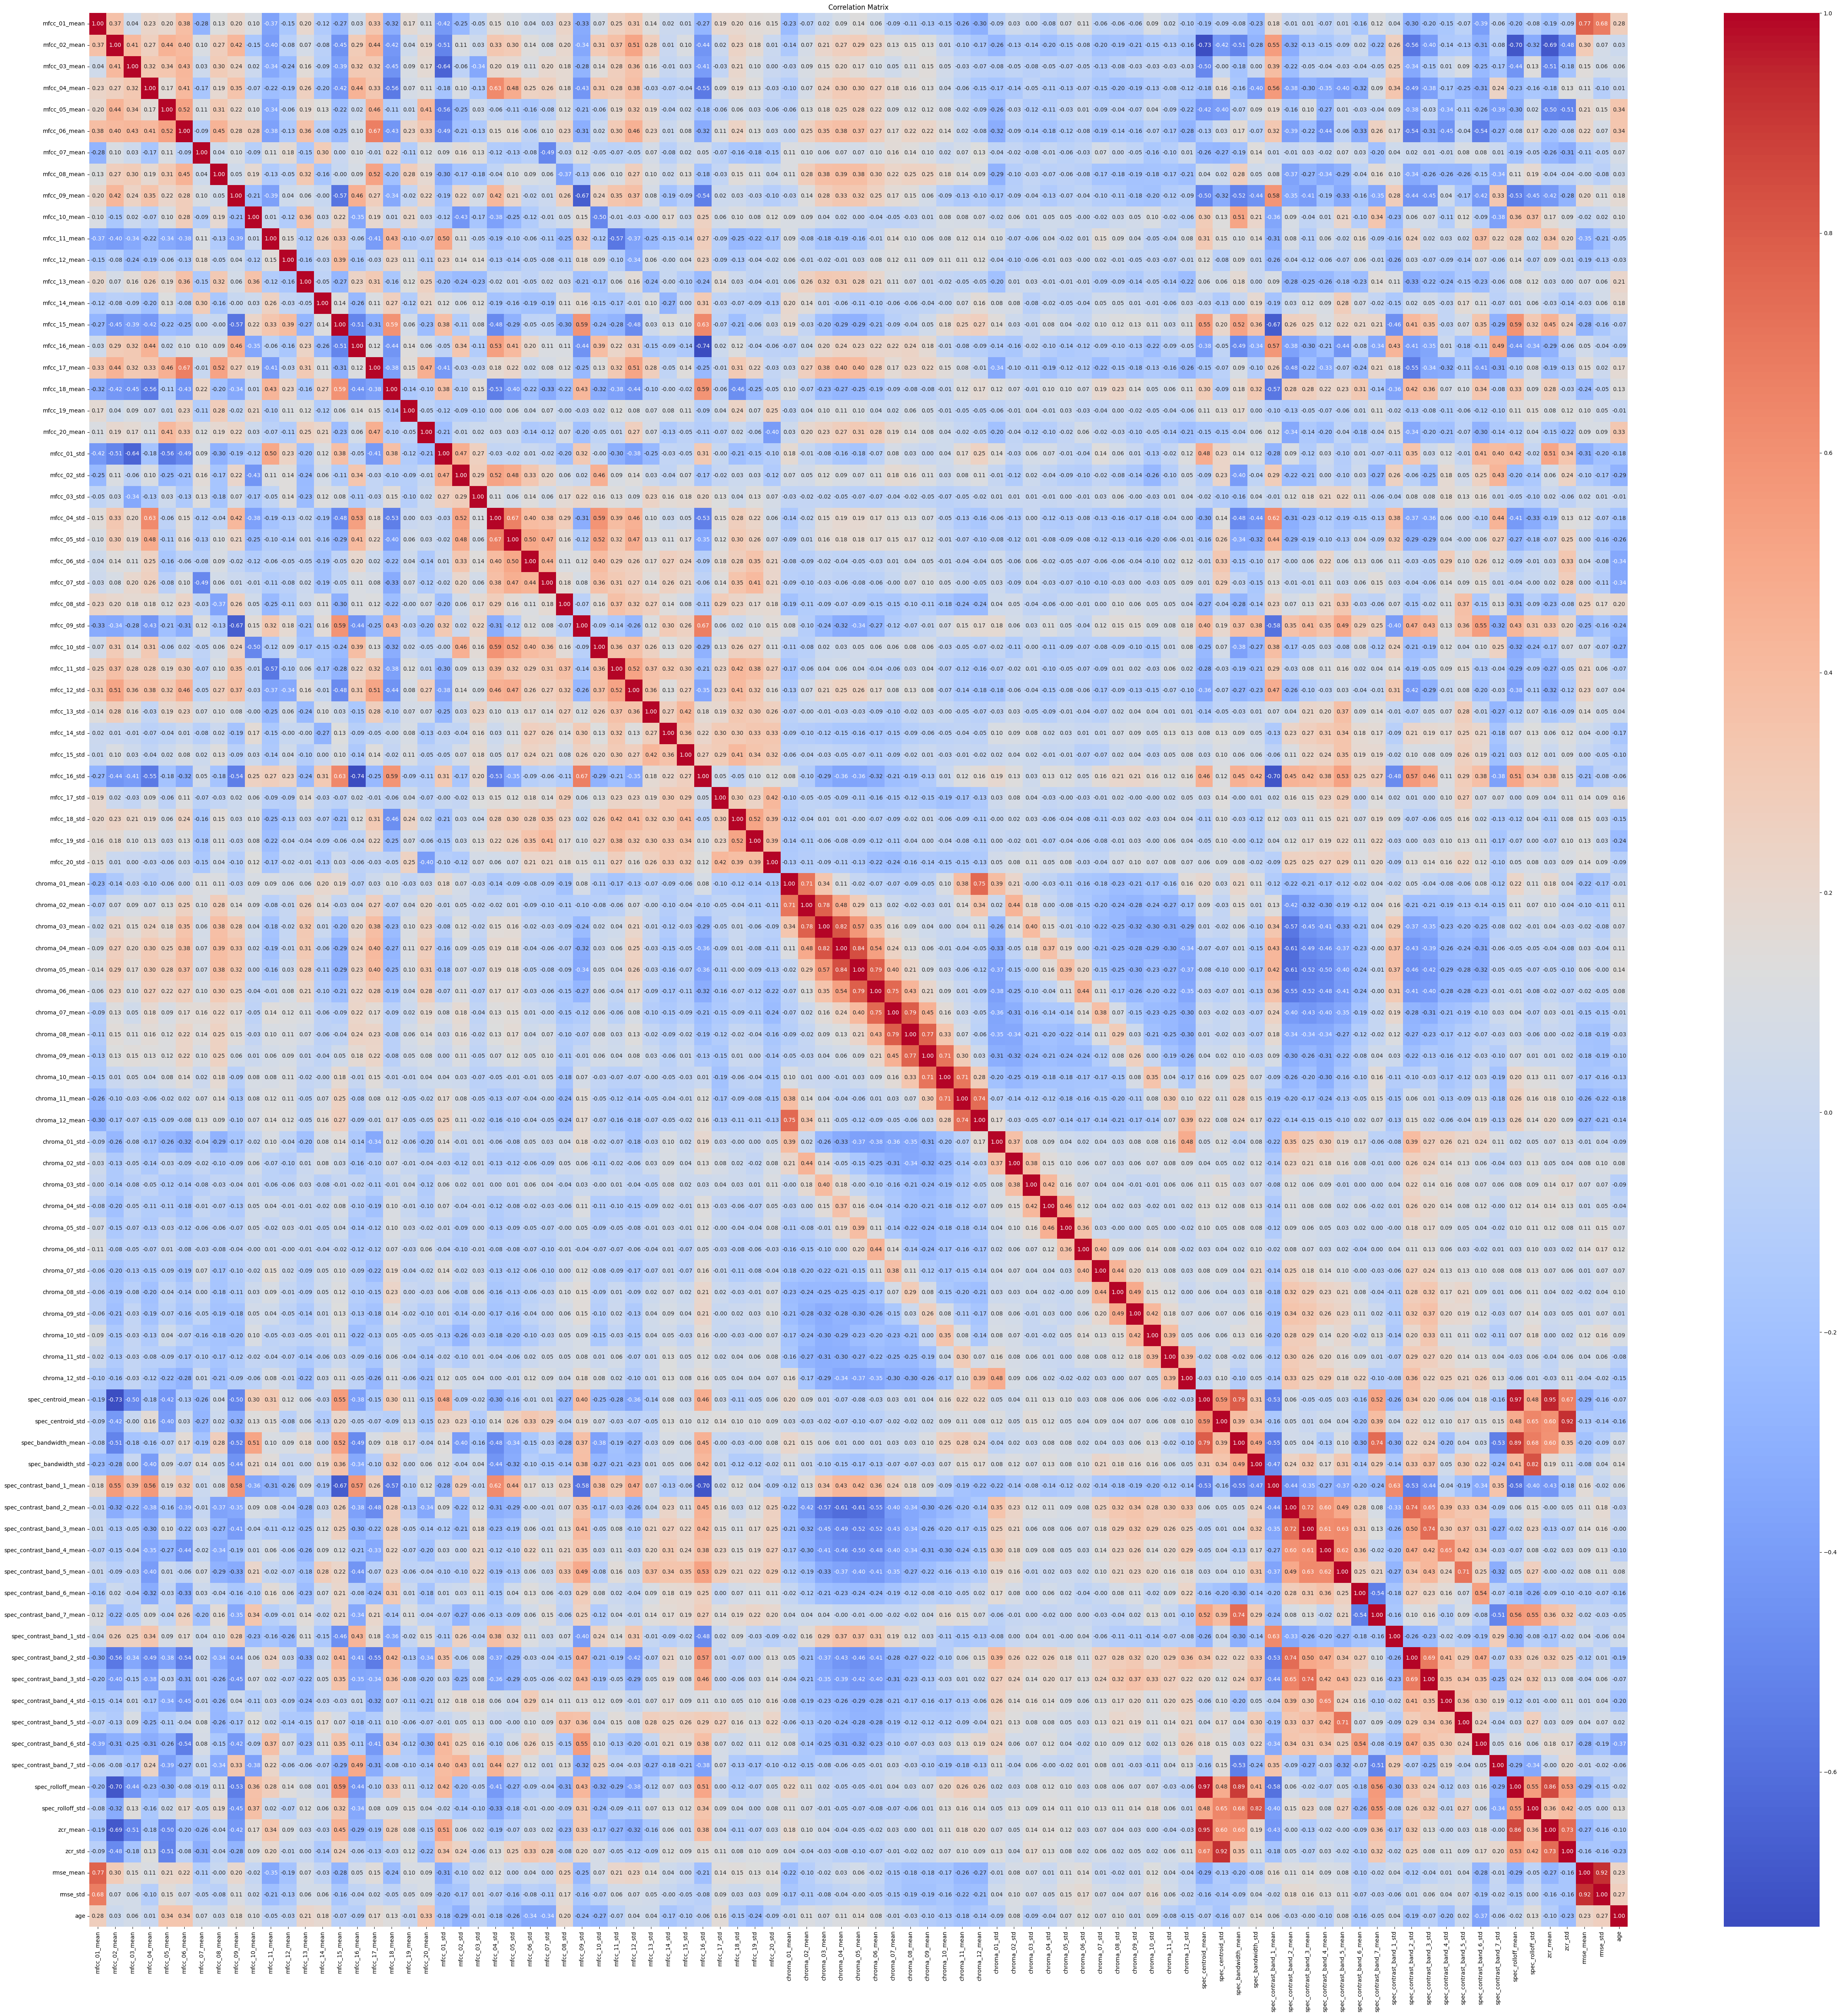

In [12]:
# Correlation Matrix (save to zoom in)

def generate_correlation_matrix(df):
    plt.figure(figsize=(50, 50))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
generate_correlation_matrix(df_eda_num)

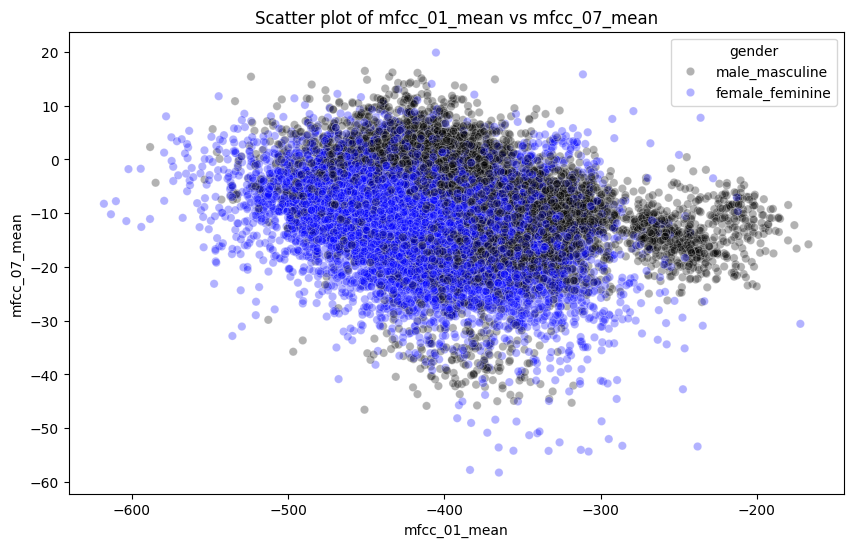

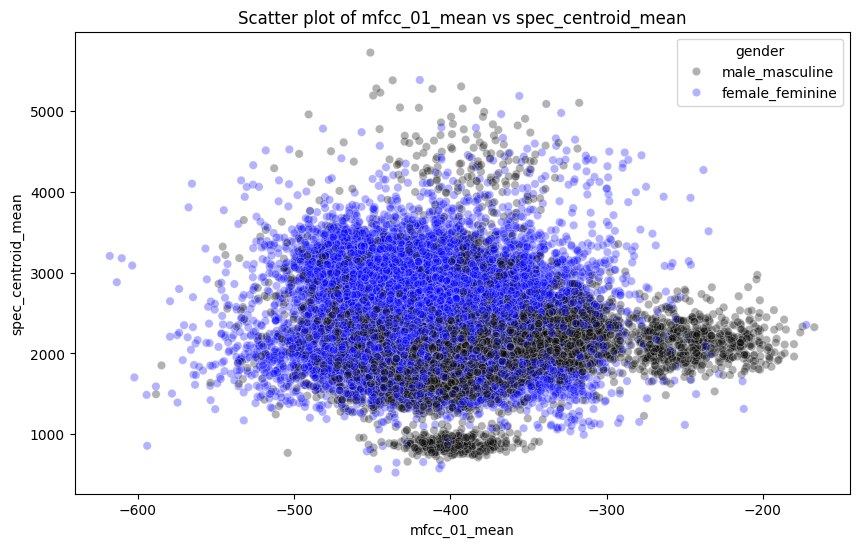

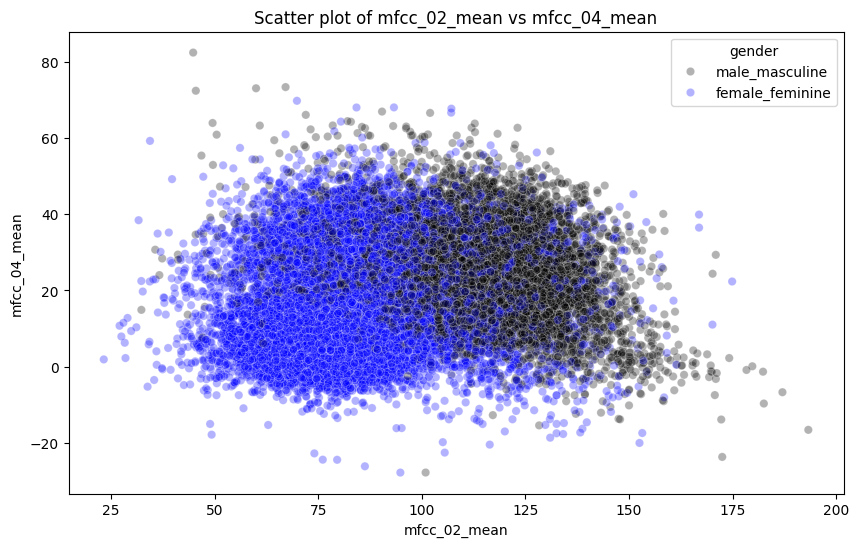

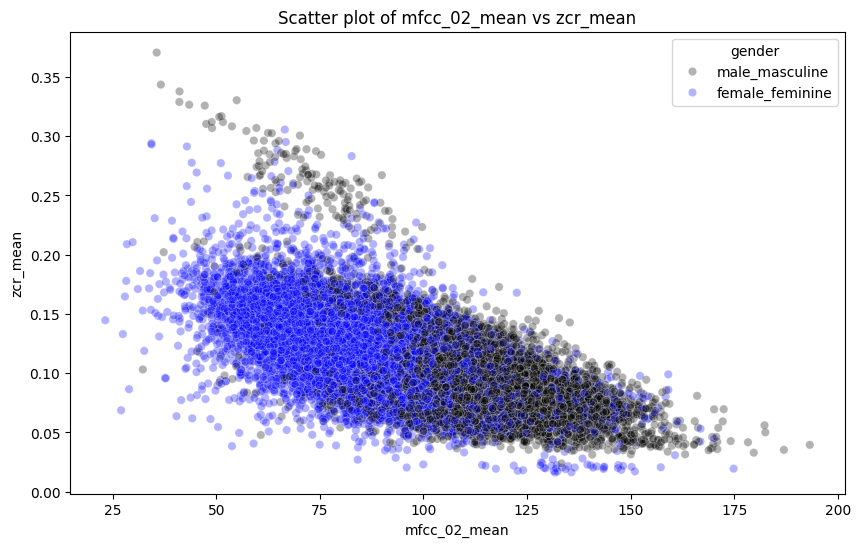

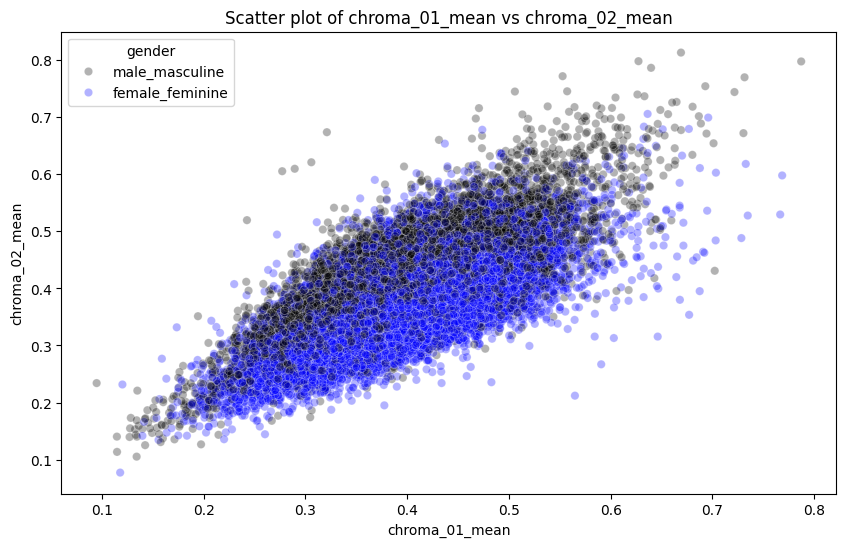

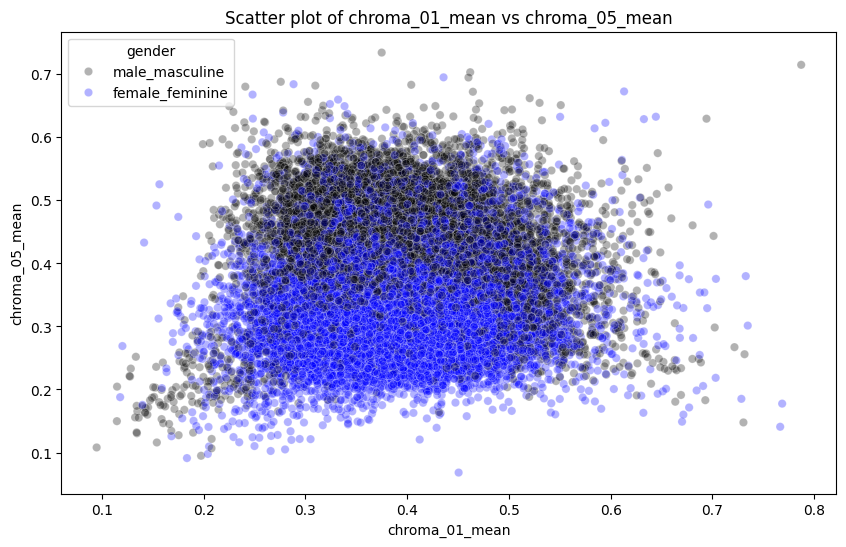

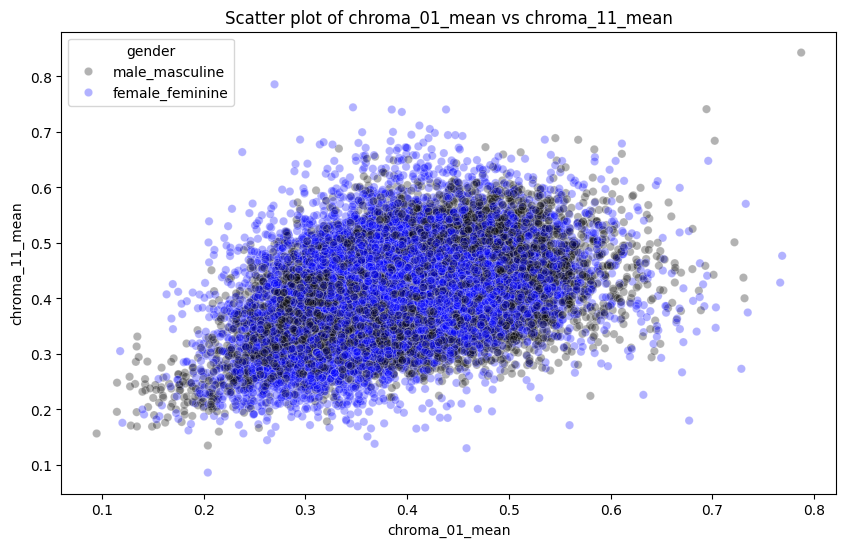

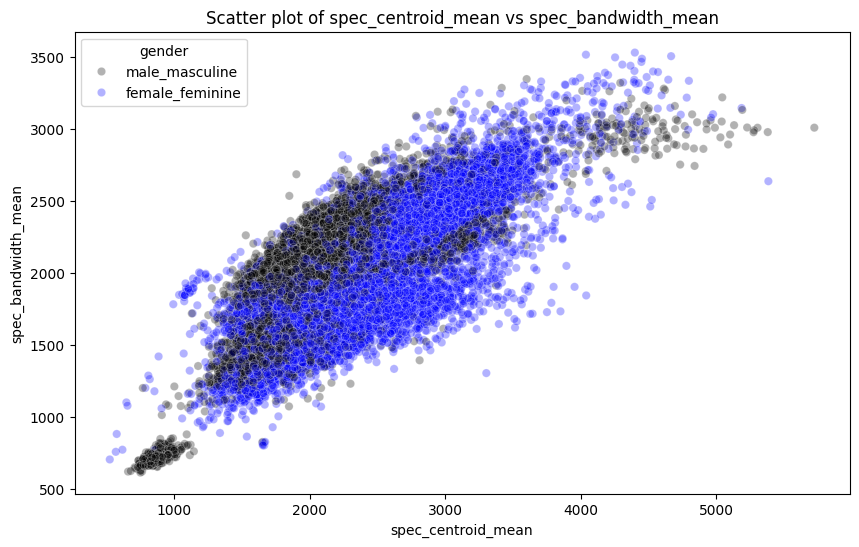

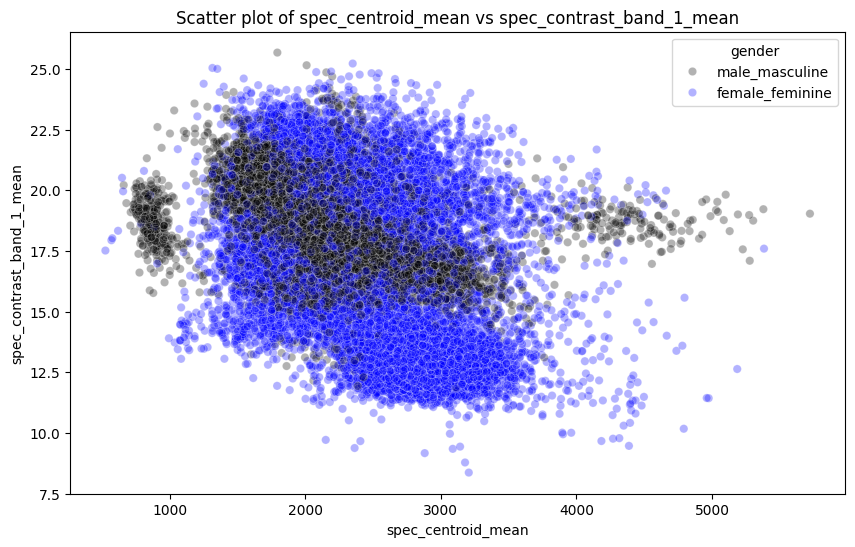

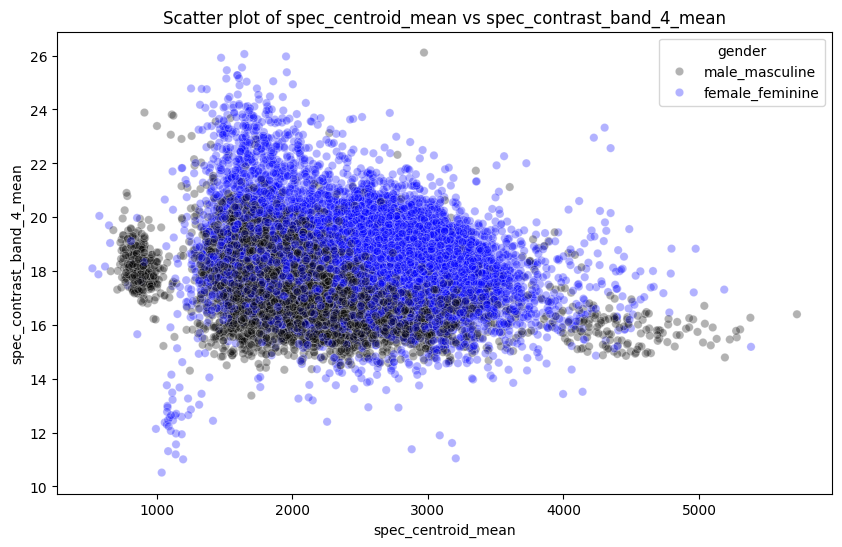

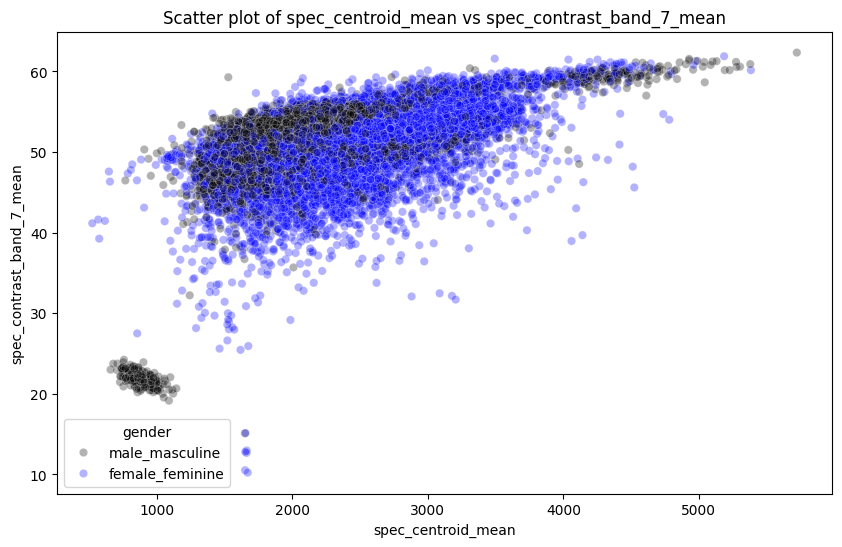

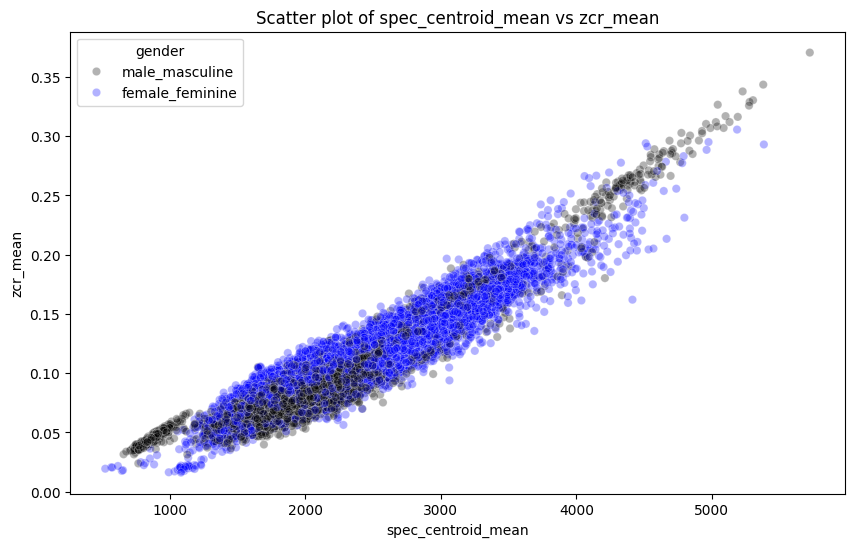

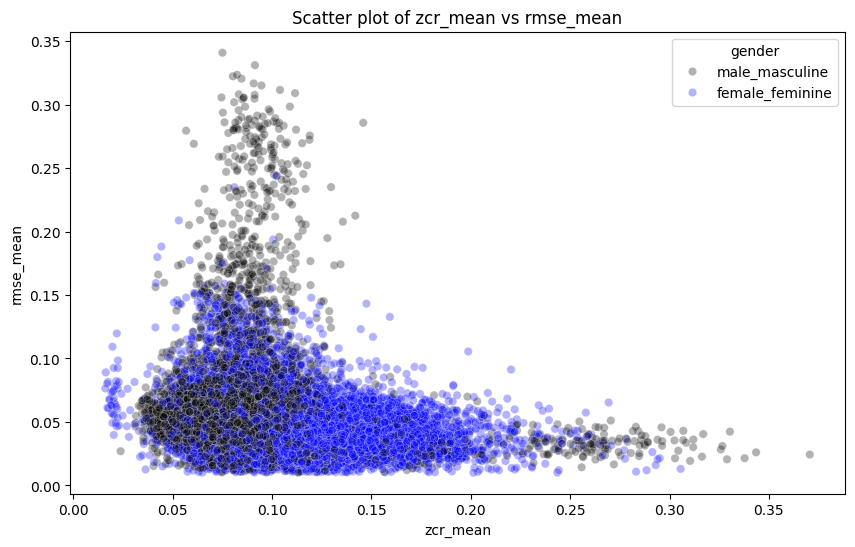

In [13]:
# scatter plots
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='gender', palette={'male_masculine': 'black', 'female_feminine': 'blue'}, alpha=0.3)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# mfcc 
# ....mfcc not multimodal
scatter_plot(df_eda, 'mfcc_01_mean', 'mfcc_07_mean')
scatter_plot(df_eda, 'mfcc_01_mean', 'spec_centroid_mean')
# ....mfcc bimodal
scatter_plot(df_eda, 'mfcc_02_mean', 'mfcc_04_mean')
scatter_plot(df_eda, 'mfcc_02_mean', 'zcr_mean')


# chroma differences in distances
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_02_mean')
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_05_mean')
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_11_mean')

# spectral
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_bandwidth_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_1_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_4_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_7_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'zcr_mean')

# temporal
scatter_plot(df_eda, 'zcr_mean', 'rmse_mean')

## Data Preprocessing

In [14]:
# data preprocessing

# TODO normalization
# TODO Log transformation
# TODO Pick apart multimodality


In [15]:
# Log transformation
def use_log1p(data, scale_by_min=False):
    '''
    Log1p transformation of the data.
    This transformation can be more beneficial than the standard log transformation 
    as it handles zero values.
    ---
    params: data: pd.Series
    return: pd.Series
    '''
    if scale_by_min:
        # Scale the data by its minimum value (smallest value will be 0)
        min = np.min(data) 
        data = data + abs(min) + 1
    assert np.min(data) >= 0, 'data contains negative values at log1p transform'
    transformed = np.log2(data)
    return transformed

# Transformer
scl = StandardScaler()
l1p = FunctionTransformer(func=use_log1p, validate=False, kw_args={'scale_by_min': True}, feature_names_out='one-to-one')

# Pipelines
pipeline_num = Pipeline(steps=[
    ('scaler', scl)
])

pipeline_l1p = Pipeline(steps=[
    ('log1p', l1p),
    ('scaler', scl)
])

# Column selection
preprocessing = ColumnTransformer([
#    ('l1p', pipeline_l1p, ['mfcc_01_mean', 'mfcc_07_std', 'mfcc_10_std', 'mfcc_20_std', 'spec_contrast_band_7_mean', 'spec_contrast_band_7_std', 'zcr_mean', 'rmse_mean', 'rmse_std']),
], remainder=pipeline_num)


In [16]:
preprocessed = preprocessing.fit_transform(X_train)
features = preprocessing.get_feature_names_out()

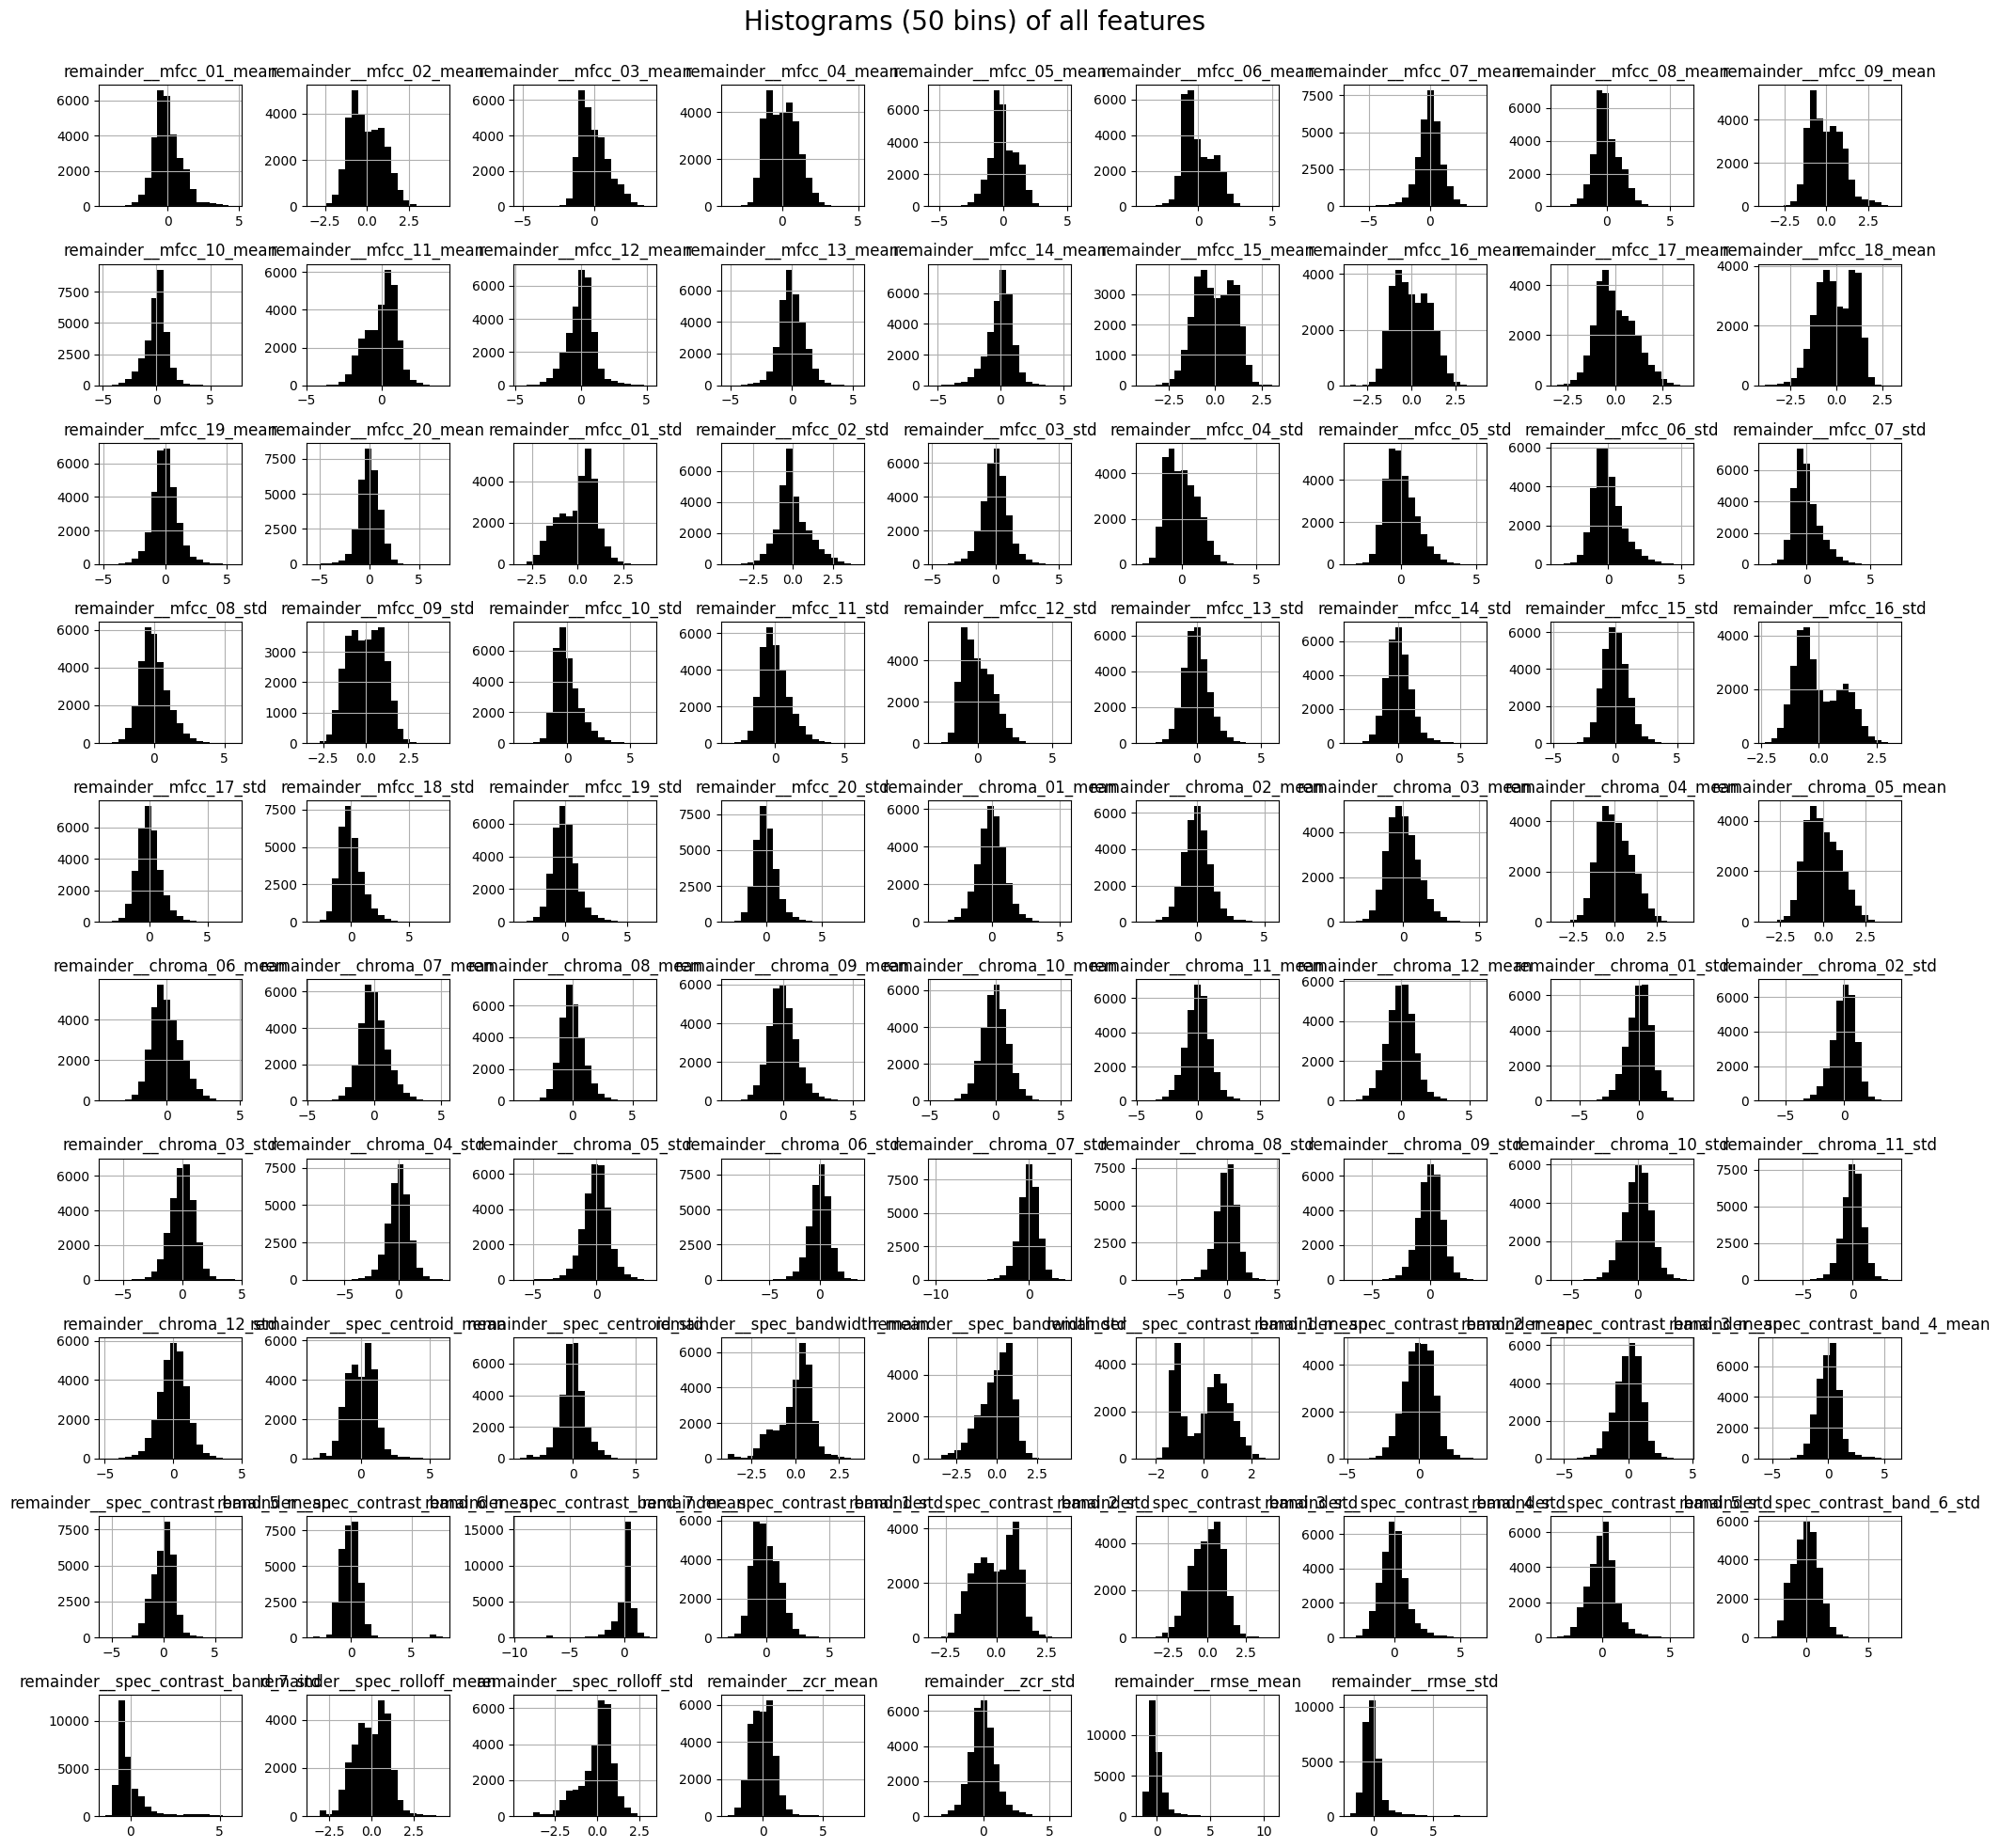

In [17]:
df = pd.DataFrame(preprocessed, columns=features)
df.head()
histograms(df)

Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.99      0.99      0.99     19014
 male_masculine       0.98      0.99      0.98     11151

       accuracy                           0.99     30165
      macro avg       0.99      0.99      0.99     30165
   weighted avg       0.99      0.99      0.99     30165

Confusion Matrix:


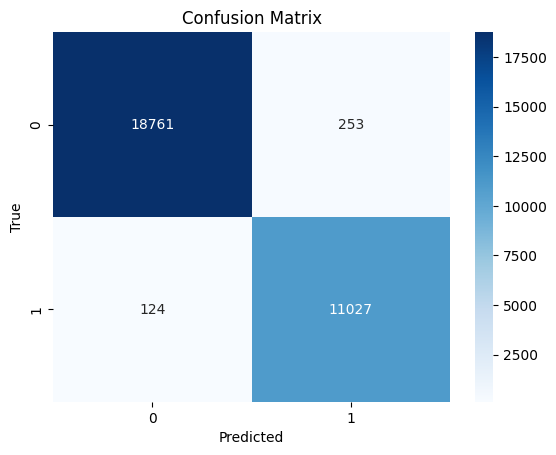

In [18]:
# usage

pipeline_logistic_regression = make_pipeline(preprocessing, LogisticRegression(max_iter=1000, class_weight='balanced', random_state=27))
logistic_regression = pipeline_logistic_regression.fit(X_train, y_train["gender"])
prd_lin_reg = pipeline_logistic_regression.predict(X_train)

# Evaluation
# comment Heinrich: seems to be absolutely overfitting
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(y_true, y_pred):
    """
    Function to evaluate the model
    :param y_true: true labels
    :param y_pred: predicted labels
    :return: None
    """
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
evaluate_model(y_train["gender"], prd_lin_reg)



Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.99      0.99      0.99      4047
 male_masculine       0.98      0.99      0.99      2418

       accuracy                           0.99      6465
      macro avg       0.99      0.99      0.99      6465
   weighted avg       0.99      0.99      0.99      6465

Confusion Matrix:


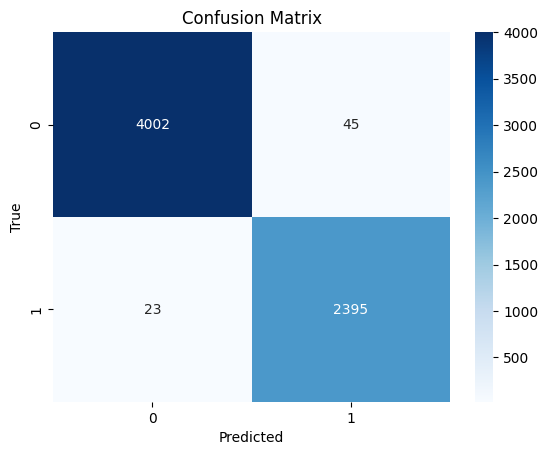

In [19]:
evaluate_model(y_val["gender"], pipeline_logistic_regression.predict(X_val))

In [20]:
print("Train prediction distribution:")
print(pd.Series(pipeline_logistic_regression.predict(X_train)).value_counts())
print("\nValidation prediction distribution:")
print(pd.Series(pipeline_logistic_regression.predict(X_val)).value_counts())

Train prediction distribution:
female_feminine    18885
male_masculine     11280
Name: count, dtype: int64

Validation prediction distribution:
female_feminine    4025
male_masculine     2440
Name: count, dtype: int64


In [ ]:
def listen_to_misclassified(data, values, predictions, labels, n):
    """
    Function to listen to misclassified audio files
    :param data: DataFrame
    :param values: true values
    :param predictions: predicted values
    :param labels: possible labels
    :param n: number of audio files to listen to
    
    :return: None
    """
    j=0
    label_num=0
    pred = pd.Series(predictions, index=values.index)
    
    for k in labels:
        print(f"Listening to {n//len(labels)} audio files misclassified as {k}:")
        label_num+=1
        winsound.Beep(1000, 800)
        winsound.Beep(2000, 700)
        for i in values.index:
            if values[i] != pred[i] and pred[i]==k:
                if j>=((n//len(labels))*label_num):
                    break
                j+=1
                winsound.Beep(1000, 200)
                print(f"\t Playing {data.loc[i, 'path']}")
                playsound.playsound(data.loc[i, "path"])
        
        
                    
    winsound.Beep(1000, 800)
    winsound.Beep(1000, 800)
    winsound.Beep(1000, 800)
    
    
        
listen_to_misclassified(data_raw, y_val["gender"],pipeline_logistic_regression.predict(X_val), ["male_masculine", "female_feminine"], 10)
    


Listening to 5 audio files misclassified as male_masculine:
	 Playing ./clips/common_voice_en_41551174.mp3
	 Playing ./clips/common_voice_en_40440601.mp3
	 Playing ./clips/common_voice_en_40982160.mp3
	 Playing ./clips/common_voice_en_40896820.mp3
	 Playing ./clips/common_voice_en_42208893.mp3
Listening to 5 audio files misclassified as female_feminine:
	 Playing ./clips/common_voice_en_41370818.mp3
